# Продолжение Задачи 3

В современном мире существуют множество различных устройств (фитнес-браслетов, камер, датчиков и т.д.), которые собирают данные об активности пользователя. Эти сведения могут быть использованы, например, для отслеживания состояния здоровья человека и определение находится ли он сейчас в безопасности, что он делает и так далее.

Данные, собранные с носимых устройств, которые отслеживают физическую активность пользователей, используются во множестве коммерческих приложений, включая здравоохранение, фитнес-тренировки, навигационную систему и так далее.

В данной задаче вам предлагается, используя информацию, собранную с помощью трех Инерциальных измерительных модуля (IMU) и пульсометра.

**Датасет содержит по 54 столбца на строку, столбцы содержат следующие данные:**
- 1 временная метка (с)
- 2 частота сердечных сокращений (уд/мин)
- 3-19 данные с датчиков на руке
- 20-36 данные с датчиков на груди
- 37-53 данные с датчиков на лодыжкн

**Сенсорные данные IMU содержат следующие столбцы:**
- 1 температура (°C)
- 2-4 Данные 3D-ускорения (мс-2), масштаб: ±16g, разрешение: 13 бит
- 5-7 Данные 3D-ускорения (мс-2), масштаб: ±6g, разрешение: 13 бит*
- 8-10 данных 3D-гироскопа (рад/с)
- 11-13 Данные 3D-магнитометра (мкТл)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

os.chdir(r"/content/gdrive/MyDrive/Я-профи подготовка по машинному обучению/Samsung Kaggle")
print(os.getcwd())

/content/gdrive/MyDrive/Я-профи подготовка по машинному обучению/Samsung Kaggle


In [ ]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Physical_Activity_Monitoring_unlabeled.csv")

df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [ ]:
df.columns

Index(['timestamp', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id'],
      dtype='object')

## Исследование данных

Прежде чем переходить к непосредственному построению модели, в первую очередь необходимо исследовать имеющихся у вас набор данных:
1. Какую задачу вы решаете (классификация, регрессия) и какая переменная является целевой?
2. Сколько переменных в данных и какого они типа?
3. Имеются ли в данных пропуски?

In [ ]:
df.shape

(534601, 53)

In [ ]:
df.dtypes

timestamp            float64
handTemperature      float64
handAcc16_1          float64
handAcc16_2          float64
handAcc16_3          float64
handAcc6_1           float64
handAcc6_2           float64
handAcc6_3           float64
handGyro1            float64
handGyro2            float64
handGyro3            float64
handMagne1           float64
handMagne2           float64
handMagne3           float64
handOrientation1     float64
handOrientation2     float64
handOrientation3     float64
handOrientation4     float64
chestTemperature     float64
chestAcc16_1         float64
chestAcc16_2         float64
chestAcc16_3         float64
chestAcc6_1          float64
chestAcc6_2          float64
chestAcc6_3          float64
chestGyro1           float64
chestGyro2           float64
chestGyro3           float64
chestMagne1          float64
chestMagne2          float64
chestMagne3          float64
chestOrientation1    float64
chestOrientation2    float64
chestOrientation3    float64
chestOrientati

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


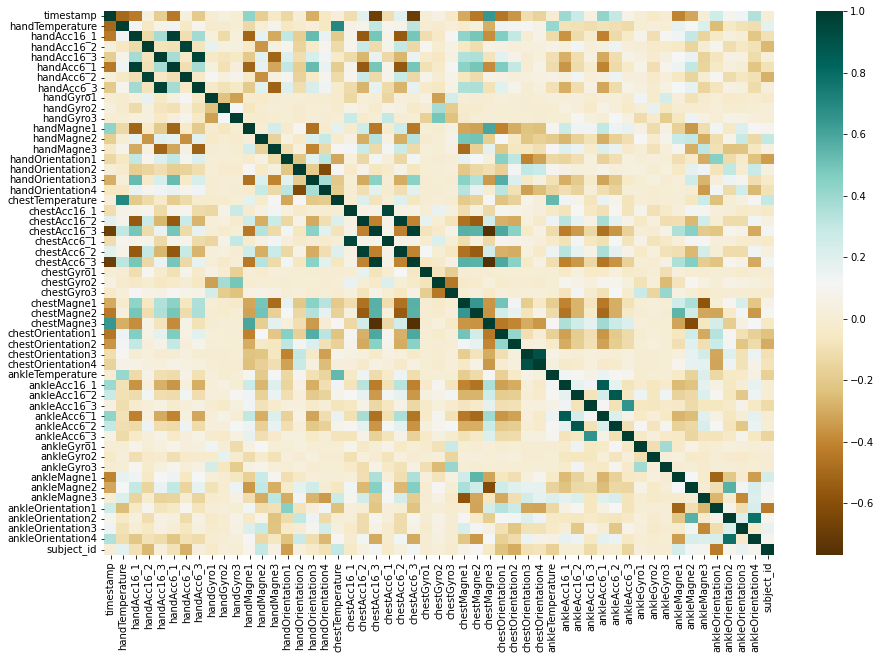

In [ ]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

df_corr = df.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [ ]:
corr_features = []

for i in range(len(df_corr.columns)):
    for j in range(i):
        if abs(df_corr.iloc[i,j]) > 0.8:
            colname = df_corr.columns[i]
            colname = df_corr.columns[i]
            corr_features.append(colname)

In [ ]:
corr_features

['handAcc6_1',
 'handAcc6_2',
 'handAcc6_3',
 'chestAcc6_1',
 'chestAcc6_2',
 'chestAcc6_3',
 'chestOrientation4',
 'ankleAcc6_1',
 'ankleAcc6_2']

In [ ]:
df.isna().sum()

timestamp               0
handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3

## Предварительная обработка

In [ ]:
df = df.drop(columns=['timestamp', 'subject_id'])

**Ка видим в данных у нас имеются множество пропущенных значений.**

Так как датасет собран из реальных данных, то в жизни случается всякое.

Пустые значения в данном случае могут быть обусловлены следующими факторами:
* Потеря данных из-за использования беспроводных датчиков.
* Проблемы с настройкой оборудования, вызывающие, например. потерю соединения с датчиками или системный сбой.

Существуют две основные стратегии при работе с пропусками:
1. Удаление пропущенных значений
2. Заполнение пропусков

**Удаление.**

При удалении пропусков можно:
1. Удалять как целиком какой-то признак (например, если больше 70% для этого признака это пропуски, тогда мы можем целиком удалить данный столбец):
`df.drop(columns='name'])`

2. Удалить можно объекты у которых имеются пропущенные значения, т.е. в данном случае мы удаляем строки. *Но будьте внимательны так как удалять из тестового набора данных не всегда возможно, иначе размерность ответов не совпадет.*
`df.dropna()`

In [ ]:
df.isna().sum() 

handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3         2546
ankleAcc6_1 

**Заполнение.**

При заполнении пропусков также существует множество различных стратегий:
- заполнение пропусков с помощью **среднего/медианы/максимума/минимум** по данному признаку.
- при категориальных признаках пропуски можно заполнить пропущенные значения с помощью наиболее часто встречающейся категории по данному признаку (**модой**).
- используя **интерполяцию** - нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом. 
- используя различные **другие алгоритмы машинного обучения** для заполнения пропусков (представьте, что все строки с пропусками - это тестовый набор данных, для которого вам нужно вернуть ответ).

Табличка в помощь:
https://help.loginom.ru/userguide/processors/preprocessing/imputation.html

In [ ]:
# Заполним пропуски с помощью среднего значения

col_missing = ['handAcc16_1', 'handAcc16_2',
               'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
               'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
               'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
               'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
               'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
               'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
               'chestMagne3', 'chestOrientation1', 'chestOrientation2',
               'chestOrientation3', 'chestOrientation4']

for i in col_missing:
    df[i].fillna(df[i].mean(), inplace=True)

df.isna().sum()

handTemperature      4041
handAcc16_1             0
handAcc16_2             0
handAcc16_3             0
handAcc6_1              0
handAcc6_2              0
handAcc6_3              0
handGyro1               0
handGyro2               0
handGyro3               0
handMagne1              0
handMagne2              0
handMagne3              0
handOrientation1        0
handOrientation2        0
handOrientation3        0
handOrientation4        0
chestTemperature        0
chestAcc16_1            0
chestAcc16_2            0
chestAcc16_3            0
chestAcc6_1             0
chestAcc6_2             0
chestAcc6_3             0
chestGyro1              0
chestGyro2              0
chestGyro3              0
chestMagne1             0
chestMagne2             0
chestMagne3             0
chestOrientation1       0
chestOrientation2       0
chestOrientation3       0
chestOrientation4       0
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3         2546
ankleAcc6_1 

In [ ]:
%%time
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=25)
imputer.fit_transform(df)

df.isna().sum()

CPU times: user 1h 11min 29s, sys: 1min 7s, total: 1h 12min 37s
Wall time: 1h 12min 14s


In [ ]:
df = df.interpolate()
df.isna().sum()

handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2           0
ankleGyro3 

In [ ]:
df.head()

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
0,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,-0.000752,...,0.043954,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652
1,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,-0.012890,...,-0.319186,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791
2,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,-0.011507,...,0.065654,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316
3,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,-1.829000,...,2.970010,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075
4,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,-0.032679,...,0.013953,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807


In [ ]:
from sklearn.preprocessing import StandardScaler

df_std = StandardScaler().fit_transform(df)

scaled_df = pd.DataFrame(df_std, index=df.index, columns=df.columns)
scaled_df

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
0,1.383760,0.757231,0.584776,0.510664,0.762694,0.616920,0.534955,-0.011434,-0.026646,-0.000382,...,0.027372,0.010026,0.013753,0.737136,1.134555,-1.145553,-0.510941,0.786246,1.336797,-0.708140
1,-1.542161,0.051790,0.072016,1.098267,-0.226447,0.000586,0.693620,0.107743,-0.437495,-0.007905,...,-0.351592,-1.032808,0.877262,-0.210992,-0.804863,-0.896624,0.725106,-0.851330,0.297695,-0.536677
2,1.098304,0.344312,-1.781430,-0.864405,0.364464,-1.869295,-0.835905,0.024908,0.014511,-0.007048,...,0.050018,0.035695,-0.004352,0.515551,0.638528,0.590981,-0.732416,1.373972,0.262530,1.674988
3,-0.293292,-1.252472,0.362269,-0.831548,-1.309192,0.393529,-0.897058,1.489085,-0.085672,-1.133556,...,3.080933,-0.213025,-1.720091,0.104544,1.450536,0.369273,0.186609,1.565125,0.008559,1.114097
4,0.598757,0.627159,0.752136,0.083334,0.640523,0.780732,0.146643,0.001532,-0.039074,-0.020171,...,-0.003937,0.005874,-0.002954,0.569350,-0.275132,-0.208420,-0.628202,-1.176374,-0.146954,-0.890970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,0.812849,-0.659715,0.202325,-0.310987,-0.753307,0.519869,-0.075309,-0.128408,0.805766,2.708128,...,-0.741746,0.738288,-0.422473,0.194368,-1.155074,0.497191,-0.139528,-1.093288,0.733590,-0.296111
534597,1.044781,-0.466995,0.037284,-0.400220,-0.517513,0.195118,-0.254573,0.028656,0.193082,1.962559,...,1.671709,-2.808538,-1.501461,-0.360189,1.335589,0.094996,0.251696,1.345437,0.198171,1.414949
534598,1.276714,-0.274276,-0.127756,-0.489454,-0.281719,-0.129634,-0.433837,0.185719,-0.419602,1.216991,...,-0.792196,-0.003788,-0.198810,-1.085757,0.831770,-0.874481,0.669670,0.696299,1.318086,0.699344
534599,-2.505574,1.404064,0.997765,-3.439181,1.803451,0.371647,-2.727570,3.067928,2.949408,0.054569,...,-3.595791,0.621058,-2.744020,-0.279940,-0.593700,1.398596,-0.990360,-1.266513,-1.047464,-0.906017


In [ ]:
scaled_df['handAcc6_2'].std()

1.0000009352782757

## Понижение размерности признакового пространства

**Для чего используется понижение размерности в данных?**

- оптимизация модели
- увеличение скорости, уменьшение памяти и времени
- для устранения лишних признаков

Будьте внимательны так как метод главных компонент чувствителен к масштабированию.

In [ ]:
%%time
from sklearn.decomposition import PCA

pca = PCA(n_components=15)

principalComponents = pca.fit_transform(scaled_df)

principalDf = pd.DataFrame(data = principalComponents)

CPU times: user 7.61 s, sys: 1.84 s, total: 9.45 s
Wall time: 7.85 s


In [ ]:
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-5.828975,0.390132,-0.047990,0.892590,0.668459,-0.551524,0.955733,-0.305086,1.817101,-0.106117,0.815649,1.367057,0.589241,0.453711,0.431464
1,0.678546,-3.898148,-1.760599,-0.201635,-0.638773,0.525297,-2.867255,1.092066,-0.233476,0.890199,-0.538237,0.277848,0.910352,0.861081,0.810983
2,-0.042508,2.553251,-1.512931,-1.194781,0.618863,1.913815,0.533486,-0.841446,0.581030,-0.243930,0.575439,-0.756050,0.339046,-2.193381,0.777607
3,3.708623,1.514171,-0.628669,-0.991430,-1.509230,0.722332,-0.163989,2.267969,1.416560,-2.240186,-0.008126,-0.049255,-0.095358,-0.722608,0.711086
4,-0.517306,-0.558160,1.160627,2.124654,0.294753,-0.993668,-0.811616,-0.601037,0.505721,0.114768,1.315632,-0.534633,-0.115916,-0.188962,0.395575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,2.817147,-1.332075,1.749637,-0.269027,4.036617,-0.842334,-1.285666,-2.061492,0.674788,0.805070,3.050743,0.576708,-0.811853,0.242557,-1.853530
534597,0.706770,3.070370,1.817409,-0.609735,-1.631932,2.823155,-0.205627,-0.141763,3.227430,0.687384,-0.471415,-1.592253,0.444447,2.946324,-0.070662
534598,0.824359,2.170088,-0.833889,-1.948850,0.394678,-0.435913,0.611831,-0.868101,1.240530,-0.880186,0.443931,1.168563,1.421348,0.993302,1.329689
534599,5.095084,1.380314,6.592033,0.795217,1.641260,-2.311580,1.177481,1.209721,-1.366996,3.801940,-1.221237,-2.220174,1.528058,-2.518667,2.769728


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


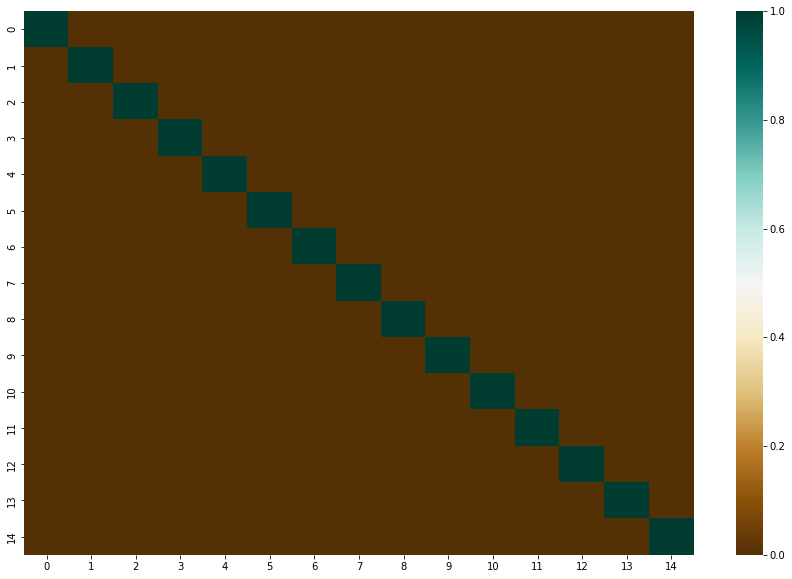

In [ ]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

principalDf_corr = principalDf.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(principalDf_corr, mask=np.zeros_like(principalDf_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.17807709 0.07607371 0.06002734 0.05605856 0.05367251 0.04680917
 0.04415442 0.03940472 0.03727391 0.03352588 0.03042308 0.02601614
 0.02382558 0.02266894 0.02174611]


In [ ]:
evr = pca.explained_variance_ratio_
evr.sum()

0.7497571714583245

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.85)

principalComponents = pca.fit_transform(scaled_df)

In [ ]:
pca.n_components_ 

22

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.17807709 0.07607371 0.06002735 0.05605857 0.05367256 0.04680918
 0.04415443 0.03940494 0.03727398 0.03352609 0.03042417 0.02601788
 0.02382613 0.02268253 0.02176632 0.0205277  0.01860089 0.01785246
 0.01505823 0.01436909 0.01361662 0.01261201]


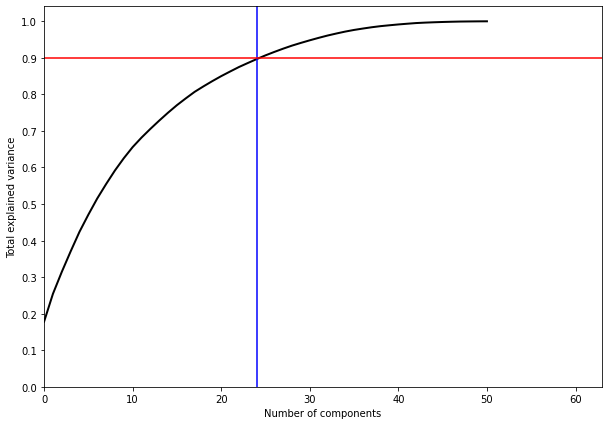

CPU times: user 5.34 s, sys: 1.1 s, total: 6.44 s
Wall time: 5.68 s


In [ ]:
%%time
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(scaled_df)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(24, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [ ]:
%%time
from sklearn.decomposition import PCA

pca = PCA(n_components=25)

principalComponents = pca.fit_transform(scaled_df)

principalDf = pd.DataFrame(data = principalComponents)

evr = pca.explained_variance_ratio_
evr.sum()

CPU times: user 9.43 s, sys: 2.1 s, total: 11.5 s
Wall time: 10.4 s


In [ ]:
evr.sum()

0.8964398120385119

## Кластеризация

Для кластеризации в данном примере мы будем использовать **KMeans**.

In [ ]:
%%time
from sklearn.cluster import KMeans

n_init = 12
max_iter = 225
tol = 0.0001
random_state = 123
n_clusters = 6

clusterer = KMeans(n_clusters=n_clusters, max_iter = max_iter, random_state = random_state)

cluster_labels = clusterer.fit_predict(principalComponents)

# inertia
inertia = clusterer.inertia_

CPU times: user 34.7 s, sys: 1.89 s, total: 36.6 s
Wall time: 26.3 s


In [ ]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

# 4094519065 - 6 кластеров без PCA
# 16360674 - 6 кластеров после PCA

For n_clusters = 6 , the inertia is : 16360674.419654056


In [ ]:
%%time
from sklearn.cluster import KMeans

n_clusters = 6

clusterer = KMeans(n_clusters=n_clusters, init='k-means++')

cluster_labels = clusterer.fit_predict(scaled_df)

# inertia
inertia = clusterer.inertia_

CPU times: user 41.1 s, sys: 1.96 s, total: 43 s
Wall time: 32.4 s


In [ ]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

# 4094519065
# 16966685
# 19141373

For n_clusters = 6 , the inertia is : 19141373.9212548


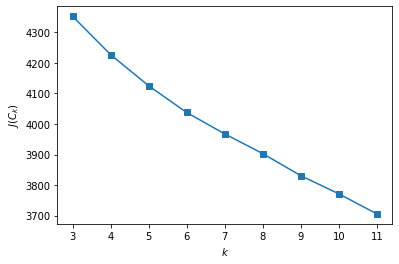

In [ ]:
%%time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_coefficients = []

for k in range(3, 12):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(principalComponents)
    inertia.append(np.sqrt(kmeans.inertia_))
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(3, 12), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(3, 12), silhouette_coefficients)
plt.xticks(range(3, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
df.head()

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
0,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,-0.000752,...,0.043954,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652
1,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,-0.012890,...,-0.319186,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791
2,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,-0.011507,...,0.065654,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316
3,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,-1.829000,...,2.970010,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075
4,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,-0.032679,...,0.013953,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807


In [ ]:
scaled_df_hand = scaled_df['handTemperature', 'handAcc16_1', 'handAcc16_2',
                           'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
                           'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
                           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

scaled_df_chest = scaled_df['chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
                            'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
                            'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
                            'chestMagne3', 'chestOrientation1', 'chestOrientation2',
                            'chestOrientation3', 'chestOrientation4']

scaled_df_ankle = scaled_df['ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
                            'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
                            'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
                            'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'] 

In [ ]:
from sklearn.cluster import KMeans

inertia_hand = []

for k in range(3, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_df_hand)
    inertia_hand.append(np.sqrt(kmeans.inertia_))

plt.plot(range(3, 15), inertia_hand, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [ ]:
inertia_chest = []

for k in range(3, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_df_chest)
    inertia_chest.append(np.sqrt(kmeans.inertia_))

plt.plot(range(3, 15), inertia_chest, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [ ]:
inertia_ankle = []

for k in range(3, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_df_ankle)
    inertia_ankle.append(np.sqrt(kmeans.inertia_))

plt.plot(range(3, 15), inertia_ankle, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

## Подготовка ответов

In [ ]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()

predictions

,index,activityID
0,0,2
1,1,3
2,2,0
3,3,0
4,4,4
...,...,...
534596,534596,3
534597,534597,0
534598,534598,0
534599,534599,5


In [ ]:
predictions['activityID'].unique()

array([2, 3, 0, 4, 1, 5], dtype=int32)

**Пример того как преобразовать номера кластеров.**

In [ ]:
import numpy as np

one = 2
two = 3
three = 0
four = 4
five = 1
six = 5

predictions['new'] = np.where(predictions['activityID'] == one, 1,
                      np.where(predictions['activityID'] == two, 2,
                               np.where(predictions['activityID'] == three, 3,
                                        np.where(predictions['activityID'] == four, 4,
                                                 np.where(predictions['activityID'] == five, 5,
                                                          np.where(predictions['activityID'] == six, 6, -1))))))
predictions['new'].value_counts()

2    132954
3    115410
1     87782
4     70184
5     66009
6     62262
Name: new, dtype: int64

In [ ]:
predictions = predictions.drop(columns=['activityID'])

predictions = predictions.rename(columns={"new": "activityID"})
predictions.head()

predictions['activityID'].unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
predictions

,index,activityID
0,0,1
1,1,2
2,2,3
3,3,3
4,4,4
...,...,...
534596,534596,2
534597,534597,3
534598,534598,3
534599,534599,6


In [ ]:
from google.colab import files

predictions.to_csv("solution.csv", index=False)

files.download("solution.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>